# Project: TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I am a movie enthusiast which is why I have chosen this TMDB Data for Analysis purpose which contains information about 10,000 movies collected from the The Movie DataBase (TMDB). Now I will be analyzing this dataset to learn more and more about different movies, about their budgets, revenues, directors and many other things.

> ## Questions for Analysis
     - Which genres were most popular throughout the years?
     - What were the Top 5 Genres throughout the years?
     - How did the amount of movies produced changed over time?
     - What is the Average Running Time Of All the Movies?
     - How does the budget changes throughout the years?
     - What should be an appropriate budget for a movie to succeed?
>


In [476]:
# Loading all necessary libraries to use in this investigation of dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [477]:
# Loading the data from a csv file to a Pandas dataframe
df = pd.read_csv('tmdb-movies.csv')

# Using .shape function to find out the number of rows and columns of the dataset
print(df.shape)

(10866, 21)


In [478]:
# Displaying a part of the dataset to see the different column names and to brainstorm some questions.
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [479]:
# Description of Column Names
# budget_adj means
# revenue_adj means 

In [480]:
# Using .info() function to find out null values in the dataset and to learn more about the datatypes used in the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [481]:
# Using .isnull() to find the number of null values in each column and summing them up using .sum() function
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [484]:
# Getting a more detailed view of the dataset using Statistical function describe()
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [485]:
# Inspected the datatypes in the dataset
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

So far the data looks fine and all the datatypes are correct, so no need to typecast the data using astype() function

 
## Data Cleaning (Removing all NaN values !)

#### The NaN values exists in  'imdb_id' , 'cast', 'homepage' , 'director', 'tagline', 'keywords', 'overview' , 'genres', 'production_companies'


In [486]:
# Checking if all null values have been dropped or not 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [487]:
# Checking the dimensions of the TMDB dataset before removing NaN values
df.shape              

(10866, 21)

In [488]:
# Use .duplicated() function to check if any duplicate row exist and then summing the total duplicated rows using .sum()
df.duplicated().sum()

1

In [489]:
# Removing duplicated rows from the dataset
df.drop_duplicates(inplace = True)

In [490]:
# Printing them again to check if any duplicated rows still exist or not - should be 0
df.duplicated().sum()

0

In [491]:
# Removing null values from all columns [ inplace = True, means making changes in the original df] 
df.dropna(inplace = True)

In [492]:
# Checking if all null values have been dropped or not 
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [493]:
# Checking the new dimensions of the TMDB dataset after cleaning the data and removing NaN values.
df.shape

(1992, 21)

#### Now, we will remove unnecessary columns from the dataframe, so that it will be easier for us to work on it.

In [494]:
# Removing multiple columns using drop function.
df.drop( ['homepage', 'overview', 'imdb_id', 'tagline' ], axis=1, inplace = True)

In [495]:
# Confirming that the desired columns are removed or not
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [502]:
# Different genres are separated using '|' 
df['genres']

0                Action|Adventure|Science Fiction|Thriller
1                Action|Adventure|Science Fiction|Thriller
2                       Adventure|Science Fiction|Thriller
3                 Action|Adventure|Science Fiction|Fantasy
4                                    Action|Crime|Thriller
5                         Western|Drama|Adventure|Thriller
6                Science Fiction|Action|Thriller|Adventure
7                          Drama|Adventure|Science Fiction
8                        Family|Animation|Adventure|Comedy
9                                  Comedy|Animation|Family
10                                  Action|Adventure|Crime
11                Science Fiction|Fantasy|Action|Adventure
12                                   Drama|Science Fiction
13                           Action|Comedy|Science Fiction
14                        Action|Adventure|Science Fiction
15                             Crime|Drama|Mystery|Western
16                                   Crime|Action|Thrill

In [503]:
# Splitting different genres using split() function
df_genres = df['genres'].str.split('|').tolist()

In [504]:
# Checking to see if the genres have been splitted or not
df_genres

[['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Fantasy'],
 ['Action', 'Crime', 'Thriller'],
 ['Western', 'Drama', 'Adventure', 'Thriller'],
 ['Science Fiction', 'Action', 'Thriller', 'Adventure'],
 ['Drama', 'Adventure', 'Science Fiction'],
 ['Family', 'Animation', 'Adventure', 'Comedy'],
 ['Comedy', 'Animation', 'Family'],
 ['Action', 'Adventure', 'Crime'],
 ['Science Fiction', 'Fantasy', 'Action', 'Adventure'],
 ['Drama', 'Science Fiction'],
 ['Action', 'Comedy', 'Science Fiction'],
 ['Action', 'Adventure', 'Science Fiction'],
 ['Crime', 'Drama', 'Mystery', 'Western'],
 ['Crime', 'Action', 'Thriller'],
 ['Science Fiction', 'Action', 'Adventure'],
 ['War', 'Adventure', 'Science Fiction'],
 ['Action', 'Family', 'Science Fiction', 'Adventure', 'Mystery'],
 ['Action', 'Drama', 'Thriller'],
 ['Drama', 'Romance'],
 ['Comedy', 'Drama'

<a id='eda'></a>
## Exploratory Data Analysis

>  Now after trimming and cleaned the data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (What were the Top 5 Genres throughout the years?)

In [505]:
#Creating a copy of the datafram
genres = df.copy()

In [506]:
# Dropping unnecessary columns from our dataframe to simplify our Exploration 
genres.drop(['budget', 'revenue','keywords', 'original_title', 'cast', 'director',
             'runtime', 'release_date', 'production_companies', 'vote_count', 'vote_average','budget_adj', 'revenue_adj'],
            axis=1, inplace=True)

In [507]:
genres.head()

,id,popularity,genres,release_year
0,135397,32.985763,Action|Adventure|Science Fiction|Thriller,2015
1,76341,28.419936,Action|Adventure|Science Fiction|Thriller,2015
2,262500,13.112507,Adventure|Science Fiction|Thriller,2015
3,140607,11.173104,Action|Adventure|Science Fiction|Fantasy,2015
4,168259,9.335014,Action|Crime|Thriller,2015


In [508]:
# Splitting genres into genre

genre = genres.loc[:,['id','genres']]
genre.head()

,id,genres
0,135397,Action|Adventure|Science Fiction|Thriller
1,76341,Action|Adventure|Science Fiction|Thriller
2,262500,Adventure|Science Fiction|Thriller
3,140607,Action|Adventure|Science Fiction|Fantasy
4,168259,Action|Crime|Thriller


In [509]:
# Initializing an empty list
list1 = []

# Splitting the genres with '|' into different genre and appending to a list
list1 = genre['genres'].str.split('|').tolist()

In [510]:
# Displaying the Genres separately now
list1

[['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Fantasy'],
 ['Action', 'Crime', 'Thriller'],
 ['Western', 'Drama', 'Adventure', 'Thriller'],
 ['Science Fiction', 'Action', 'Thriller', 'Adventure'],
 ['Drama', 'Adventure', 'Science Fiction'],
 ['Family', 'Animation', 'Adventure', 'Comedy'],
 ['Comedy', 'Animation', 'Family'],
 ['Action', 'Adventure', 'Crime'],
 ['Science Fiction', 'Fantasy', 'Action', 'Adventure'],
 ['Drama', 'Science Fiction'],
 ['Action', 'Comedy', 'Science Fiction'],
 ['Action', 'Adventure', 'Science Fiction'],
 ['Crime', 'Drama', 'Mystery', 'Western'],
 ['Crime', 'Action', 'Thriller'],
 ['Science Fiction', 'Action', 'Adventure'],
 ['War', 'Adventure', 'Science Fiction'],
 ['Action', 'Family', 'Science Fiction', 'Adventure', 'Mystery'],
 ['Action', 'Drama', 'Thriller'],
 ['Drama', 'Romance'],
 ['Comedy', 'Drama'

In [512]:
# Converting the list into a dataframe with respect to id using stack() function

stacked_genre = pd.DataFrame(list1, index = genre['id']).stack()
stacked_genre

id       
135397  0             Action
        1          Adventure
        2    Science Fiction
        3           Thriller
76341   0             Action
        1          Adventure
        2    Science Fiction
        3           Thriller
262500  0          Adventure
        1    Science Fiction
        2           Thriller
140607  0             Action
        1          Adventure
        2    Science Fiction
        3            Fantasy
168259  0             Action
        1              Crime
        2           Thriller
281957  0            Western
        1              Drama
        2          Adventure
        3           Thriller
87101   0    Science Fiction
        1             Action
        2           Thriller
        3          Adventure
286217  0              Drama
        1          Adventure
        2    Science Fiction
211672  0             Family
                  ...       
657     1           Thriller
        2          Adventure
6978    0          Adventure
    

In [513]:
# Removing id as the index
stacked_genre = stacked_genre.reset_index()
stacked_genre.head()

,id,level_1,0
0,135397,0,Action
1,135397,1,Adventure
2,135397,2,Science Fiction
3,135397,3,Thriller
4,76341,0,Action


In [514]:
# Removing level_1 column

stacked_genre = stacked_genre.loc[:, ['id', 0]]
stacked_genre.head()

,id,0
0,135397,Action
1,135397,Adventure
2,135397,Science Fiction
3,135397,Thriller
4,76341,Action


In [515]:
# Renaming columns
stacked_genre.columns = ['id', 'genre']

In [516]:
# Merging the two dataframes genres and stacked_genre
merged_df = pd.merge(genres, stacked_genre, on='id', how='left')

In [517]:
# Removing unnecessary columns from the Dataframe
merged_df.drop(['genres', 'id'], axis=1, inplace=True)

In [456]:
merged_df.head()

,popularity,release_year,genre
0,32.985763,2015,Action
1,32.985763,2015,Adventure
2,32.985763,2015,Science Fiction
3,32.985763,2015,Thriller
4,28.419936,2015,Action


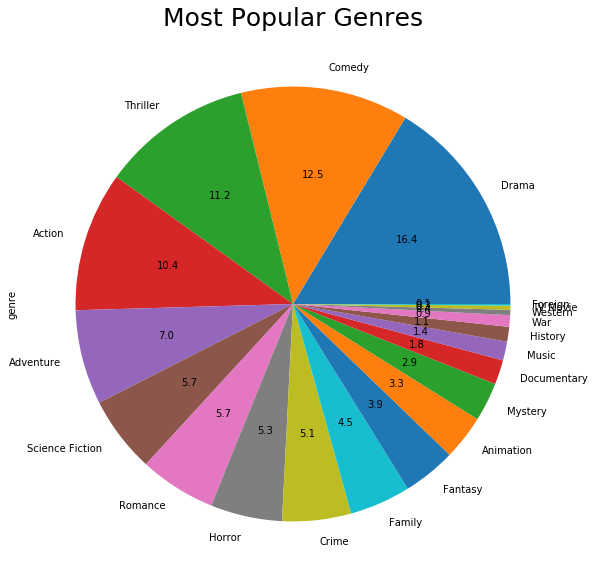

In [518]:
# Using plot function to plot a pie-chart
merged_df['genre'].value_counts().plot(kind = 'pie', figsize=(13,10), autopct='%.1f'); # autopct shows percentage in piechart 

plt.title('Most Popular Genres', fontsize = 25);

# This creates a key for the pie-chart but since it's getting messy so ignoring it
#plt.legend(loc =2, frameon = False);

### From the pie-chart above, we can clearly see that 'Drama' , 'Comedy', 'Thriller', 'Action', and 'Adventure' are the Top 5  Genres throughout the years.


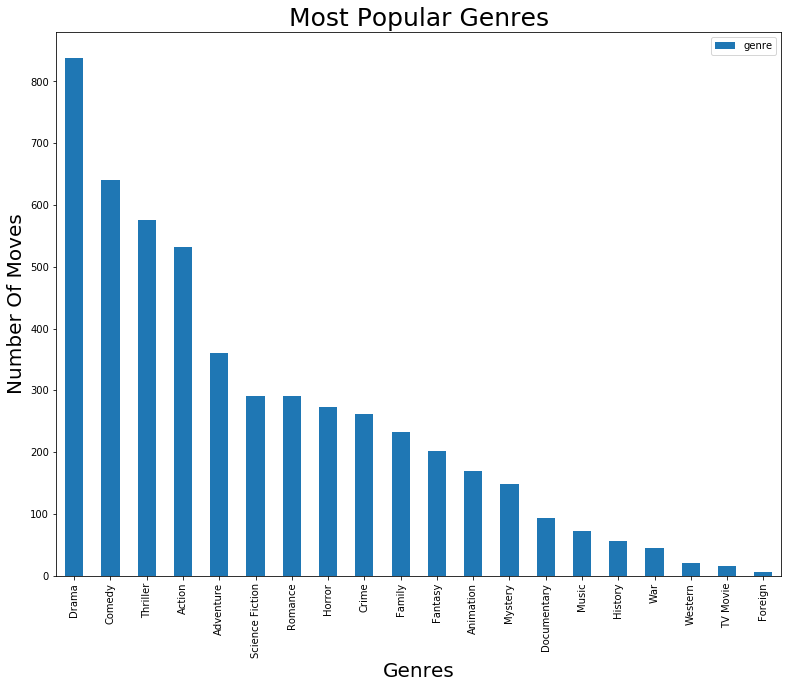

In [519]:
# Using plot function to plot a barchart
merged_df['genre'].value_counts().plot(kind = 'bar', figsize=(13,10));
plt.title('Most Popular Genres', fontsize = 25);
plt.ylabel("Number Of Moves", fontsize = 20 );
plt.xlabel("Genres", fontsize = 20);
plt.legend();

#### The above graph shows different genres ranging from the most watched to the least watched and also shows the frequency of each.

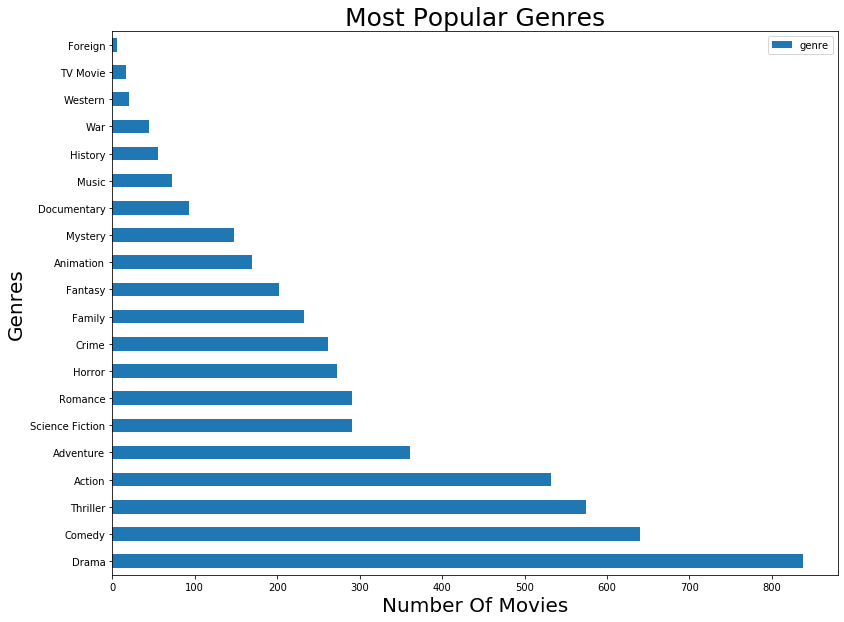

In [520]:
# Plotting a Horizontal Bar Chart using plot function
merged_df['genre'].value_counts().plot(kind = 'barh', figsize=(13,10));
plt.title('Most Popular Genres', fontsize = 25);
plt.ylabel("Genres", fontsize = 20 );
plt.xlabel("Number Of Movies", fontsize = 20);
plt.legend();

#### This graph makes it much easier to visualize different Genres and the Frequencies of each Genre

In [521]:
# We can also confirm that the Top Genre is 'Drama' using describe() function 

merged_df['genre'].describe()

count      5123
unique       20
top       Drama
freq        838
Name: genre, dtype: object



### Research Question 2 (How did the amount of movies produced changed over time?)

In [522]:
# To create an array of release_year
years = df['release_year'].unique()    

# Sorting them orderwise
years.sort()

display(years)

array([1961, 1962, 1963, 1964, 1965, 1967, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [523]:
amount_of_movies = []
#df_genres = df['genres']

for year in years:
    filtered_df = merged_df[merged_df['release_year'] == year]            # Filtering out data and storing it wrt to years
    no_of_rows = len(filtered_df.index)                                   # to find number of rows
    amount_of_movies.append((year,no_of_rows))                            # Appending years,rows

In [354]:
# Returns a list of movies
amount_of_movies        

[(1961, 2),
 (1962, 3),
 (1963, 3),
 (1964, 5),
 (1965, 3),
 (1967, 3),
 (1969, 3),
 (1970, 3),
 (1971, 12),
 (1972, 2),
 (1973, 6),
 (1974, 5),
 (1975, 10),
 (1976, 4),
 (1977, 8),
 (1978, 7),
 (1979, 14),
 (1980, 4),
 (1981, 16),
 (1982, 11),
 (1983, 20),
 (1984, 17),
 (1985, 13),
 (1986, 6),
 (1987, 21),
 (1988, 13),
 (1989, 16),
 (1990, 22),
 (1991, 8),
 (1992, 18),
 (1993, 26),
 (1994, 19),
 (1995, 31),
 (1996, 49),
 (1997, 26),
 (1998, 30),
 (1999, 59),
 (2000, 55),
 (2001, 53),
 (2002, 89),
 (2003, 99),
 (2004, 133),
 (2005, 193),
 (2006, 247),
 (2007, 361),
 (2008, 360),
 (2009, 488),
 (2010, 519),
 (2011, 534),
 (2012, 375),
 (2013, 326),
 (2014, 358),
 (2015, 415)]

In [524]:
# Reference: 
# [https://thispointer.com/python-pandas-how-to-convert-lists-to-a-dataframe/] 
# [https://kite.com/python/answers/how-to-convert-a-list-of-lists-into-a-pandas-dataframe-in-python]

# Converting list into a dataframe 
column_names = ['Year', 'Number Of Movies']
df_amount_of_movies = pd.DataFrame(amount_of_movies, columns = column_names)
df_amount_of_movies

,Year,Number Of Movies
0,1961,2
1,1962,3
2,1963,3
3,1964,5
4,1965,3
5,1967,3
6,1969,3
7,1970,3
8,1971,12
9,1972,2


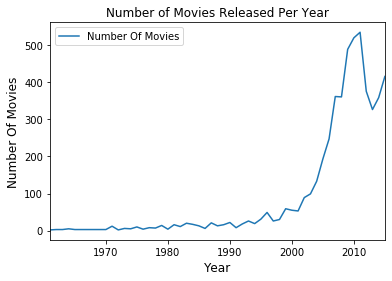

In [525]:
df_amount_of_movies.plot(x = 'Year', y = 'Number Of Movies', kind = 'line');
plt.title('Number of Movies Released Per Year');
plt.xlabel('Year', fontsize=12);
plt.ylabel('Number Of Movies', fontsize=12);

#### From the graph above, we can see that the Number Of Movies has increased tremendously throughout the years. 
#### In the year 2011, a peak was attained of 534 Movies, which is quite evident from the mountainous curve in the graph.

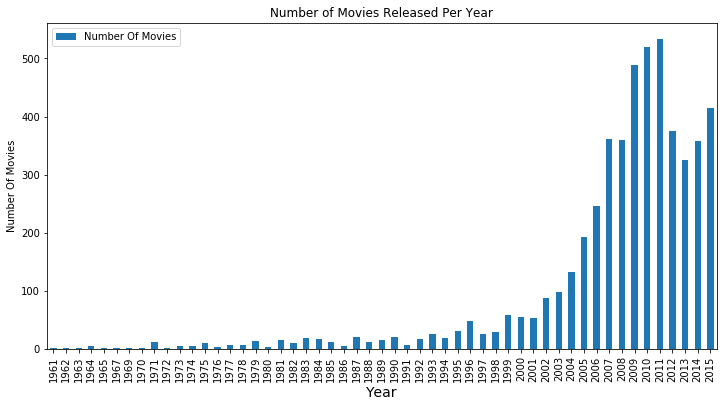

In [526]:
df_amount_of_movies.plot(x = 'Year', y = 'Number Of Movies', kind = 'bar', figsize=(12,6));
plt.title('Number of Movies Released Per Year');
plt.xlabel('Year', fontsize = 14);
plt.ylabel('Number Of Movies');

#### This graph gives a much more clearer picture and shows that 2011 is the year with the most number of movies released.



### Research Question 3 (What is the Average Running Time Of All the Movies?)

In [527]:
avg_runtime = df['runtime'].mean()
avg_runtime

106.04016064257029

The Average Runtime Of All Movies In This Dataset is 106 minutes approximately. Let us confirm this by plotting a histogram and take a deeper look at the results.

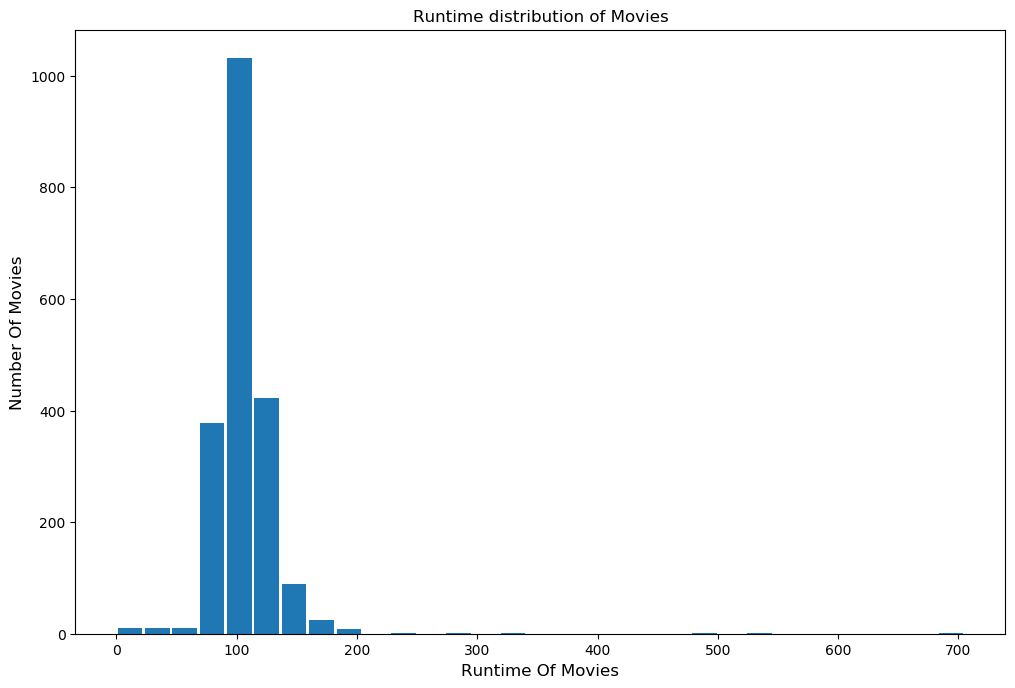

In [22]:
# Setting the figure size
plt.figure(figsize=(12,8), dpi=100)

plt.xlabel('Runtime Of Movies' , fontsize = 12)
plt.ylabel('Number Of Movies', fontsize = 12)
plt.title('Runtime distribution of Movies')

plt.hist(df['runtime'], rwidth = 0.9, bins = 31)

# To display the histogram
plt.show()

#### From the graph above we can clearly see that the Average Running Time of all movies is approximately close to 100 minutes. 





### Research Question 4 (How does the budget changes throughout the years?)

In [528]:
# Combinning released year and budget in a new dataframe using groupby() function
combined_year_budget = df.groupby('release_year')['budget'].sum()
combined_year_budget

release_year
1961       3000000
1962       1100000
1963       2500000
1964       4000000
1965      11000000
1967       9500000
1969       7000000
1970             0
1971      13277000
1972       6000000
1973      15000000
1974       7060000
1975       8600000
1976        150000
1977      25000000
1978       3000000
1979      76800000
1980      19000000
1981      81500000
1982      48500000
1983     117850000
1984      86400000
1985      49000000
1986      25000000
1987      71700000
1988       7000000
1989     132000000
1990     135000030
1991      48000000
1992     160705538
1993     225125000
1994      71027000
1995     191100000
1996     574500000
1997     548250000
1998     550060000
1999    1124025000
2000     863000000
2001    1040000000
2002    1412500227
2003    1526361898
2004    2447607000
2005    2410475010
2006    3302703800
2007    4801295700
2008    4300750001
2009    6151132457
2010    7221730339
2011    7711134894
2012    5972288400
2013    4927182750
2014    4724425927

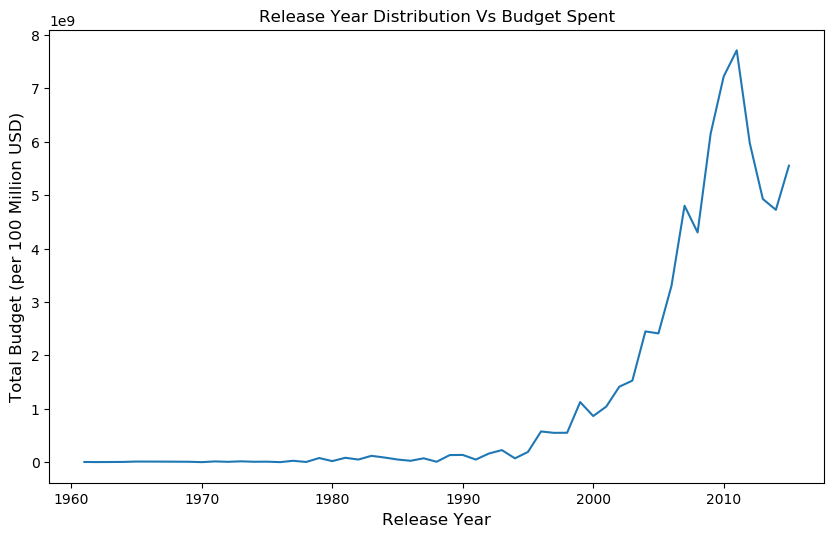

In [529]:
# Setting the figure size
plt.figure(figsize=(10,6), dpi=100)

plt.xlabel('Release Year' , fontsize = 12)
plt.ylabel('Total Budget (per 100 Million USD)', fontsize = 12)
plt.title('Release Year Distribution Vs Budget Spent')

# Plotting the dataframe
plt.plot(combined_year_budget)

# To display the histogram
plt.show()

#### This graph clearly shows that throughout the years the total budget of the movies has been increasing rapidly and in 2011 it reached to it's maximum potential.

In [530]:
# Shows the maximum total budget of all movies
combined_year_budget.max()

7711134894

In [531]:
# Confirming using pandas function

# Shows in which year Maximum budget was used
combined_year_budget.idxmax()

2011

In [532]:
# Checking in which year minimum budget was used.
combined_year_budget.idxmin()

1970

In [533]:
# Retrieving details for the lowest budget movie in 1970
min_budget = df.query('release_year == 1970')      
min_budget

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10657,5722,0.374514,0,0,Beyond the Valley of the Dolls,Dolly Read|Cynthia Myers|Marcia McBroom|John L...,Russ Meyer,pop|pop star|musical,109,Comedy|Drama|Thriller,Twentieth Century Fox Film Corporation,7/17/70,19,6.2,1970,0.0,0.0


In [534]:
# Retrieving details for the maximum budget movies in 2011
max_budget = df.query('release_year == 2011')
max_budget

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3372,1771,7.959228,140000000,370569774,Captain America: The First Avenger,Chris Evans|Hugo Weaving|Tommy Lee Jones|Hayle...,Joe Johnston,new york|usa|world war ii|nazis|marvel comic,124,Action|Adventure|Science Fiction,Marvel Studios,7/22/11,5025,6.5,2011,1.357157e+08,3.592296e+08
3374,12445,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,self sacrifice|magic|frog|sorcerer|school,130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,7/7/11,3750,7.7,2011,1.211748e+08,1.287184e+09
3375,1865,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,sea|captain|mutiny|sword|prime minister,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/11,3180,6.3,2011,3.683713e+08,9.904175e+08
3376,61791,4.504530,93000000,482860185,Rise of the Planet of the Apes,Andy Serkis|Karin Konoval|Freida Pinto|James F...,Rupert Wyatt,intelligence|zoo|cage|dystopia|golden gate bridge,105,Thriller|Action|Drama|Science Fiction,20th Century Fox,8/3/11,2578,6.9,2011,9.015402e+07,4.680837e+08
3377,10195,4.123520,150000000,444115007,Thor,Chris Hemsworth|Natalie Portman|Tom Hiddleston...,Kenneth Branagh,new mexico|banishment|shield|marvel comic|hammer,115,Adventure|Fantasy|Action,Marvel Studios|Marvel Entertainment,4/21/11,4485,6.5,2011,1.454097e+08,4.305242e+08
3378,49530,3.596188,40000000,173930596,In Time,Justin Timberlake|Amanda Seyfried|Cillian Murp...,Andrew Niccol,bank|future|time|dystopia|cops and robbersÂ,109,Action|Thriller|Science Fiction,Regency Enterprises|Strike Entertainment|New R...,10/27/11,2068,6.6,2011,3.877592e+07,1.686080e+08
3379,47327,3.355611,50000000,28931401,Drive Angry,Nicolas Cage|Amber Heard|William Fichtner|Bill...,Patrick Lussier,bone|car explosion|premarital sex|satanic cult...,105,Fantasy|Thriller|Action|Crime,Summit Entertainment|Saturn Films|Nu Image Fil...,2/24/11,378,5.3,2011,4.846990e+07,2.804604e+07
3380,27582,3.186679,40000000,51070807,The Mechanic,Jason Statham|Ben Foster|Donald Sutherland|Min...,Simon West,poison|chicago|prostitute|martial arts|assassin,93,Action|Thriller|Crime,CBS Films|Millennium Films|Chartoff-Winkler Pr...,1/13/11,678,6.3,2011,3.877592e+07,4.950794e+07
3381,45612,2.994474,32000000,147332697,Source Code,Jake Gyllenhaal|Michelle Monaghan|Vera Farmiga...,Duncan Jones,bomb|identity|fantasy|bomber|suspicion,93,Thriller|Science Fiction|Mystery,The Mark Gordon Company|Vendome Pictures,3/30/11,1668,7.0,2011,3.102074e+07,1.428240e+08
3382,56292,2.952740,145000000,694713380,Mission: Impossible - Ghost Protocol,Tom Cruise|Jeremy Renner|Simon Pegg|Paula Patt...,Brad Bird,fight|sequel|mission|explosion|broken arm,133,Action|Thriller|Adventure,Paramount Pictures|Skydance Productions|Bad Ro...,12/7/11,3036,6.7,2011,1.405627e+08,6.734538e+08


In [535]:
# The maximum budget movie is 380 million dollars USD.
max_budget['budget'].max()

380000000

In [536]:
# Finding the maximum budget movie throughout these years
maximum_budget_movie = max_budget.query('budget == 380000000')
maximum_budget_movie

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3375,1865,4.95513,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,sea|captain|mutiny|sword|prime minister,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/11,3180,6.3,2011,3.683713e+08,9.904175e+08


#### Pirates of the Caribbean: On Stranger Tides is the maximum budget movie throughout all the years.

### Research Question 5  (What should be an appropriate budget for a movie to succeed?)

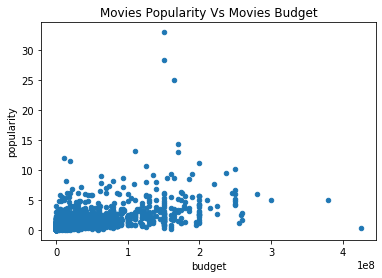

In [537]:
# Plotting a scatter plot 
df.plot(x='budget',y='popularity', kind='scatter', title='Movies Popularity Vs Movies Budget');

#### After studying the above graph, we can make some important and useful deductions. We can say, it's not necessary to have a higher budget for a movie to have a higher popularity. 

#### The maximum popularity is approximately 32

In [538]:
# To compare results with entries of population greater than 10
df_popularity_10 = df[df['popularity'] >= 10]

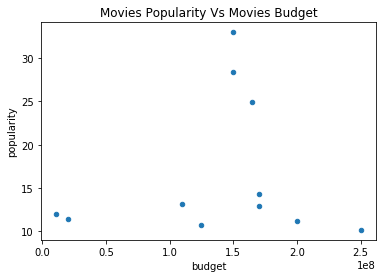

In [539]:
# Plotting a scatter plot 
df_popularity_10.plot(x='budget',y='popularity', kind='scatter', title='Movies Popularity Vs Movies Budget');

#### This scatter plot gives us a better and a clean look at the Movies Popularity and Movies Budget. In this scatter plot we can see that movie whose budget is approximately between 1.5 to 2.0 have a significantly higher popularity. Hence, this can be said as a suitable budget for movies.

In [540]:
# Summary statistics for popularity of a movie
df['popularity'].describe()

count    1992.000000
mean        1.316763
std         1.873563
min         0.000620
25%         0.384079
50%         0.774223
75%         1.538639
max        32.985763
Name: popularity, dtype: float64

In [541]:
# Summary statistics for budget of a movie
df['budget'].describe()

count    1.992000e+03
mean     3.454924e+07
std      5.061878e+07
min      0.000000e+00
25%      0.000000e+00
50%      1.500000e+07
75%      4.800000e+07
max      4.250000e+08
Name: budget, dtype: float64

<a id='conclusions'></a>
## Conclusions



The first research question **"What were the Top 5 Genres throughout the years?"** has shown useful results, as the most popular genre turned out to be **Drama**. This data could be extremey useful for the 'Production Companies', because now they know which type of movies tend to be more popular among the masses and this could help them to drive more potential customers.

The second research question **"How did the amount of movies produced changed over time?"** gave a well defined increasing trend for movies released. The graph also shows that a peak was attained in the year 2011 for the most movies released. Also according to Wikipedia, **Film critic Scout Tafoya considers 2011 as the best year for cinema.** 

The third research question **"What is the Average Running Time Of All the Movies?"** shows an accurate result of approximately 106 minutes. This is also evident from the histogram which is plotted against Running Time and Number Of Movies.

The fourth research question **"How does the budget changes throughout the years?"** shows quite useful results to the users because users can observe that throughout the years the budget has been increasing throughout the years and suddenly skyrockets in the year 2011, which is considered as the best year for cinema according to Wikipedia. In 2011, **Pirates of the Caribbean: On Stranger Tides** is the maximum budget movie till this day, with a maximum budget of 380 Million Dollars USD.

The fifth research question **"What should be an appropriate budget for a movie to succeed?"** has shown surprising results. Some useful deductions which are clearly evident from the graph are it's not necessary for a movie to become popular and succeed even if it has a higher budget and vice versa.




### Conclusively, the limitations which one has to consider are that, there many entries which were missing (NaN) had been removed from the dataset so the accuracy of the dataset has been significantly reduced and this will greatly affect the results. Also the results obtained like Movies Popularity are only for educational purpose and many other factors are needed to be kept in mind in order to treat them as generalization. 
